In [1]:
## Installing open cv

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load an image from file
image_path = "./istockphoto-1470130937-170667a.webp"
img = cv2.imread(image_path)

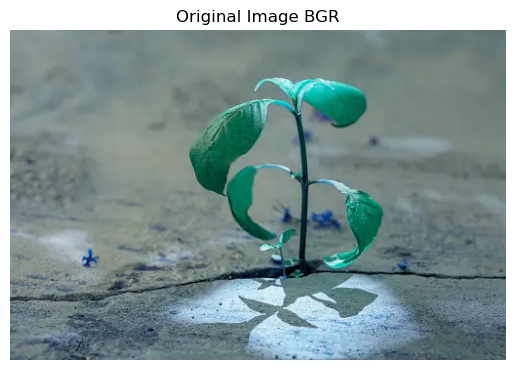

In [5]:
plt.imshow(img)
plt.title('Original Image BGR')
plt.axis('off')
plt.show()

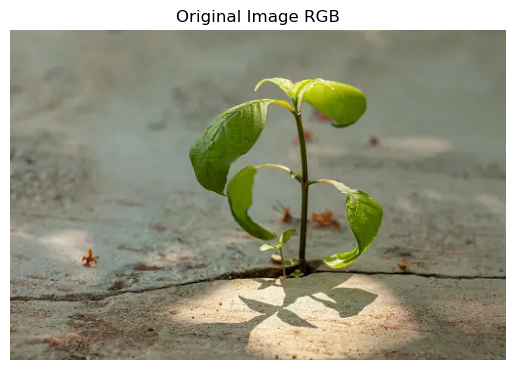

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image RGB')
plt.axis('off')
plt.show()

In [7]:
img.shape

(339, 509, 3)

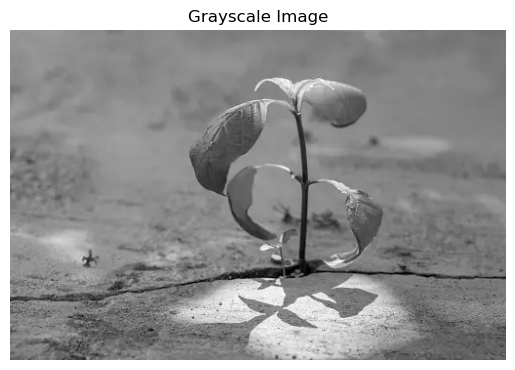

In [8]:
# convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [9]:
gray_img.shape

(339, 509)

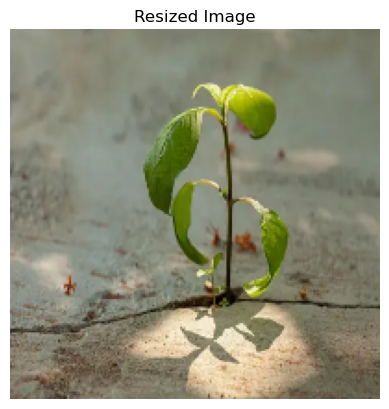

In [10]:
# resizeing the image
resized_img = cv2.resize(img, (200, 200))

plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

In [11]:
resized_img.shape

(200, 200, 3)

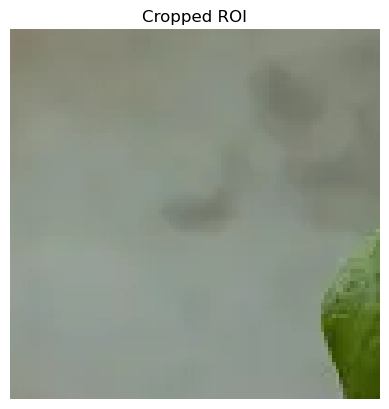

In [12]:
# Cropiing the image
roi = img[50:150, 100:200]

plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title('Cropped ROI')
plt.axis('off')
plt.show()

In [13]:
roi.shape

(100, 100, 3)

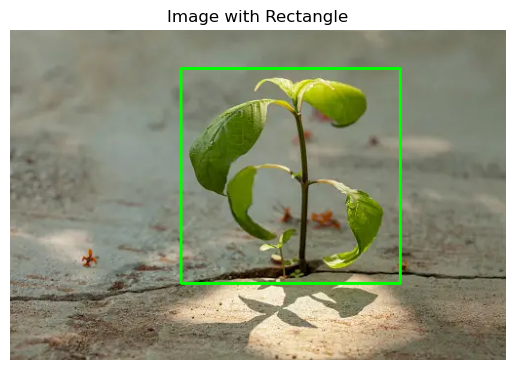

In [14]:
xmin, ymin = (175, 40)
xmax, ymax = (400, 260)

# rectangle on image
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Rectangle')
plt.axis('off')
plt.show()

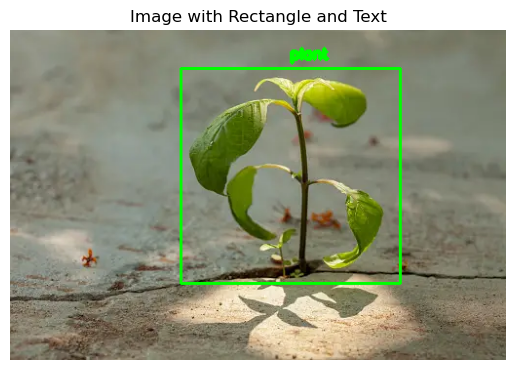

In [15]:
# annotate image with text
text_position = ((xmin + xmax) // 2, ymin - 10)
cv2.putText(img, "plant", text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 3)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image with Rectangle and Text')
plt.axis('off')
plt.show()

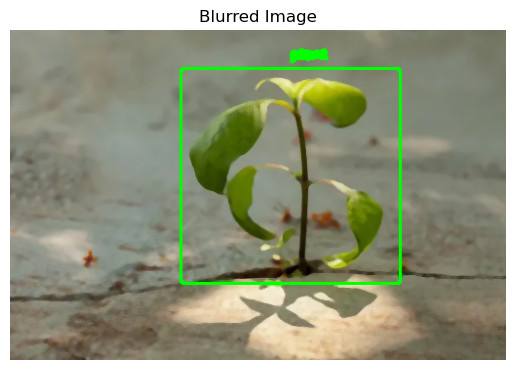

In [17]:
# median Blur for noise reduction
median_blur_img = cv2.medianBlur(img, 5)

plt.imshow(cv2.cvtColor(median_blur_img, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

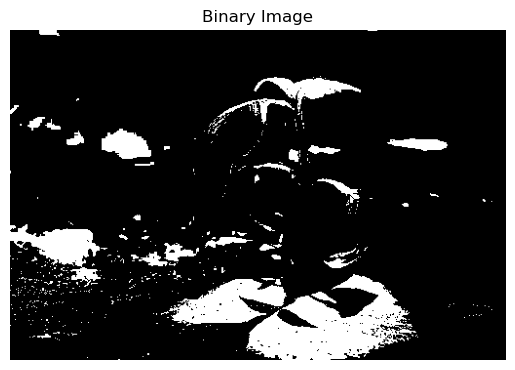

In [18]:
# convert an image to a binary image using thresholding
ret, binary_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)

plt.imshow(binary_img, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

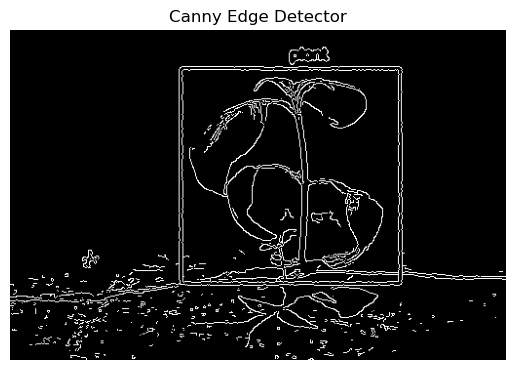

In [19]:
edges = cv2.Canny(img, 190, 255)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detector')
plt.axis('off')
plt.show()

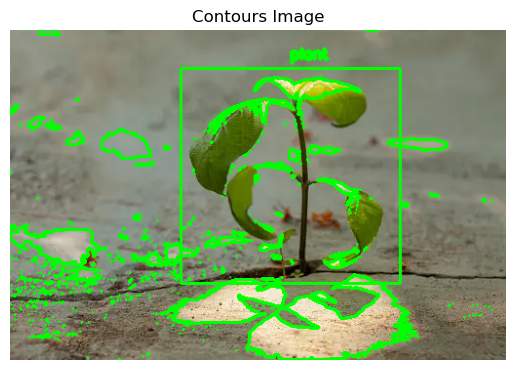

In [20]:
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Contours Image')
plt.axis('off')
plt.show()

# Studio 

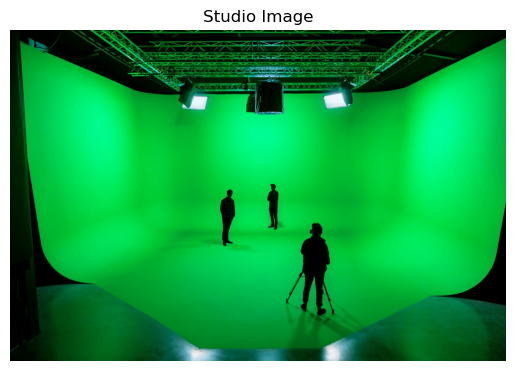

In [21]:
studio_img = cv2.imread("Studio_Image.jpeg")
studio_img_rgb = cv2.cvtColor(studio_img, cv2.COLOR_BGR2RGB)

plt.imshow(studio_img_rgb)
plt.title('Studio Image')
plt.axis('off')
plt.show()

In [22]:
studio_img_rgb.shape

(1667, 2500, 3)

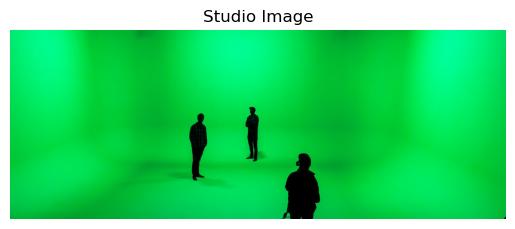

In [23]:
cropped_studio = studio_img_rgb[450:1250, 300: 2400]

plt.imshow(cropped_studio)
plt.title('Studio Image')
plt.axis('off')
plt.show()

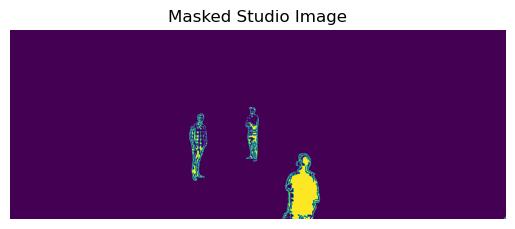

In [24]:
lower_green = np.array([0, 0, 0])
upper_green = np.array([255, 255, 0])

mask = cv2.inRange(cropped_studio, lower_green, upper_green)

plt.imshow(mask)
plt.title('Masked Studio Image')
plt.axis('off')
plt.show()

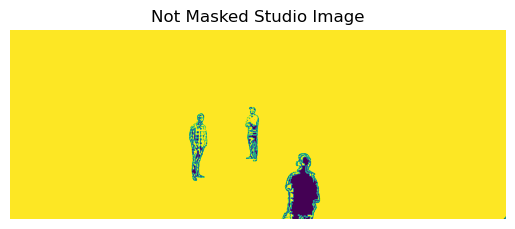

In [25]:
mask_inv = cv2.bitwise_not(mask)

plt.imshow(mask_inv)
plt.title('Not Masked Studio Image')
plt.axis('off')
plt.show()

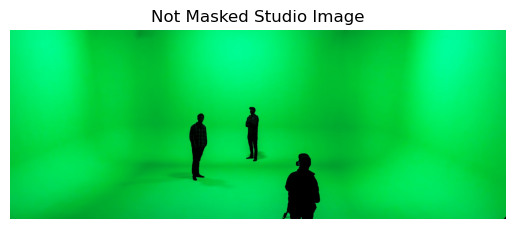

In [26]:
roi = cv2.bitwise_and(cropped_studio, cropped_studio, mask=mask_inv)
plt.imshow(roi)
plt.title('Not Masked Studio Image')
plt.axis('off')
plt.show()

In [27]:
replacement_img = cv2.imread("./Space.jpeg")
replacement_img_rgb = cv2.cvtColor(replacement_img, cv2.COLOR_BGR2RGB)

In [28]:
replacement_img_resized = cv2.resize(replacement_img, (cropped_studio.shape[1], cropped_studio.shape[0]))

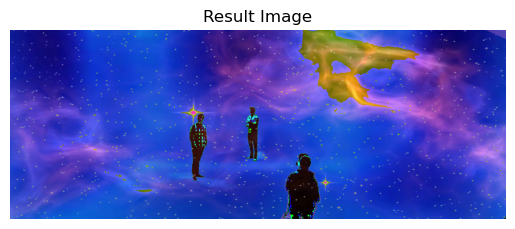

In [36]:
result_img = replacement_img_resized - roi

plt.imshow(result_img)
plt.title('Result Image')
plt.axis('off')
plt.show()